# Damping harmonic oscillator 

## Without excitation force

### Problem formulation

$$\ddot{x} = - 2 \zeta \omega_0 \dot{x} - \omega_0^2 x$$

We define $$\left\{ 
             \begin{array}{ll}
             x_1 = x \\
             x_2 = \dot{x}
             \end{array}
             \right.
          $$


We write so     $$\dot{X}(t) = \begin{pmatrix} \dot{x} \\ 
                                                          - 2 \zeta \omega_0 \dot{x} - \omega_0^2 x \end{pmatrix} = f\left(X, t\right)$$

In [7]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
import ipywidgets as ipw

### Step response

In [8]:
def ode(X, t, zeta, omega0):
    """
    Free Harmonic Oscillator ODE
    """
    x, dotx = X
    ddotx = -2*zeta*omega0*dotx - omega0**2*x
    return [dotx, ddotx]

def update(zeta = 0.05, omega0 = 2.*np.pi):
    """
    Update function.
    """
    X0 = [1., 0.]
    sol = integrate.odeint(ode, X0, t, args = (zeta, omega0))
    line0.set_ydata(sol[:, 0])

Nt = 1000
t = np.linspace(0., 10., Nt)
dummy = np.zeros_like(t)
fig = plt.figure()
line0, = plt.plot(t, dummy, label = "position")
plt.grid()
plt.ylim(-1., 1.)
plt.xlabel("Time, $t$")
plt.ylabel("Amplitude, $a$")
plt.legend()

ipw.interact(update, zeta = (0., 1., 0.01), 
           omega0 = (2.*np.pi*0.05, 2.*np.pi*5, 2.*np.pi*0.01));

<IPython.core.display.Javascript object>

interactive(children=(FloatSlider(value=0.05, description='zeta', max=1.0, step=0.01), FloatSlider(value=6.283…

## With sinusoidal excitation force

### Problem formulation

$$\ddot{x} = - 2 \zeta \omega_0 \dot{x} - \omega_0^2 x  + F_m \sin(\omega_d t)$$

Like above, we can write this equation as for all $t$,

$$\dot{X}(t) = \begin{pmatrix} \dot{x} \\ 
                              - 2 \zeta \omega_0 \dot{x} - \omega_0^2 x + F_m \sin(\omega_d t) \end{pmatrix} = f\left(X, t\right)$$

<IPython.core.display.Javascript object>


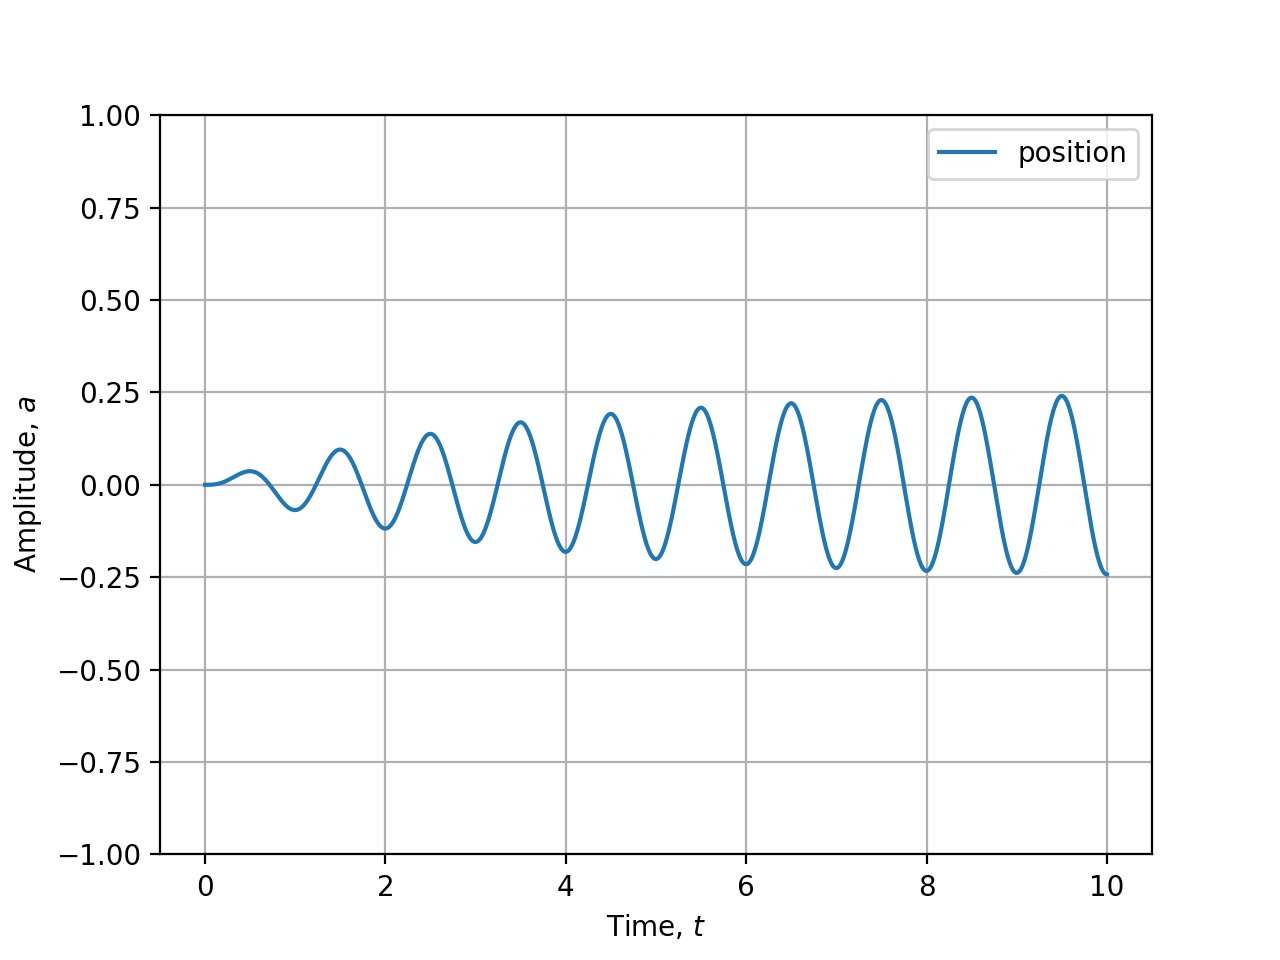

interactive(children=(FloatSlider(value=0.05, description='zeta', max=0.2, step=0.01), FloatSlider(value=6.283…

In [4]:
def odeDrive(X, t, zeta, omega0, omegad_omega0):
    """
    Driven Harmonic Oscillator ODE
    """
    x, dotx = X
    omegad = omegad_omega0 * omega0
    ddotx = -2*zeta*omega0*dotx - omega0**2*x + F_m * np.sin(omegad * t)
    return [dotx, ddotx]

def update(zeta = 0.05, omega0 = 2.*np.pi, omegad_omega0 = 1.):
    """
    Update function.
    """
    X0 = np.zeros(2)
    sol = integrate.odeint(odeDrive, X0, t, args = (zeta, omega0, omegad_omega0))
    line0.set_ydata(sol[:, 0])

Nt = 1000
F_m = 1.
t = np.linspace(0., 10., Nt)
dummy = np.zeros_like(t)
fig = plt.figure()
line0, = plt.plot(t, dummy, label = "position")
plt.grid()
plt.ylim(-1., 1.)
plt.xlabel("Time, $t$")
plt.ylabel("Amplitude, $a$")
plt.legend()

ipw.interact(update, zeta = (0., .2, 0.01), 
             omega0 = (2.*np.pi*0.5, 2.*np.pi*5, 2.*np.pi*0.01),
             omegad_omega0 = (0.1, 2., 0.05));

## Phase portrait without excitation 

<IPython.core.display.Javascript object>


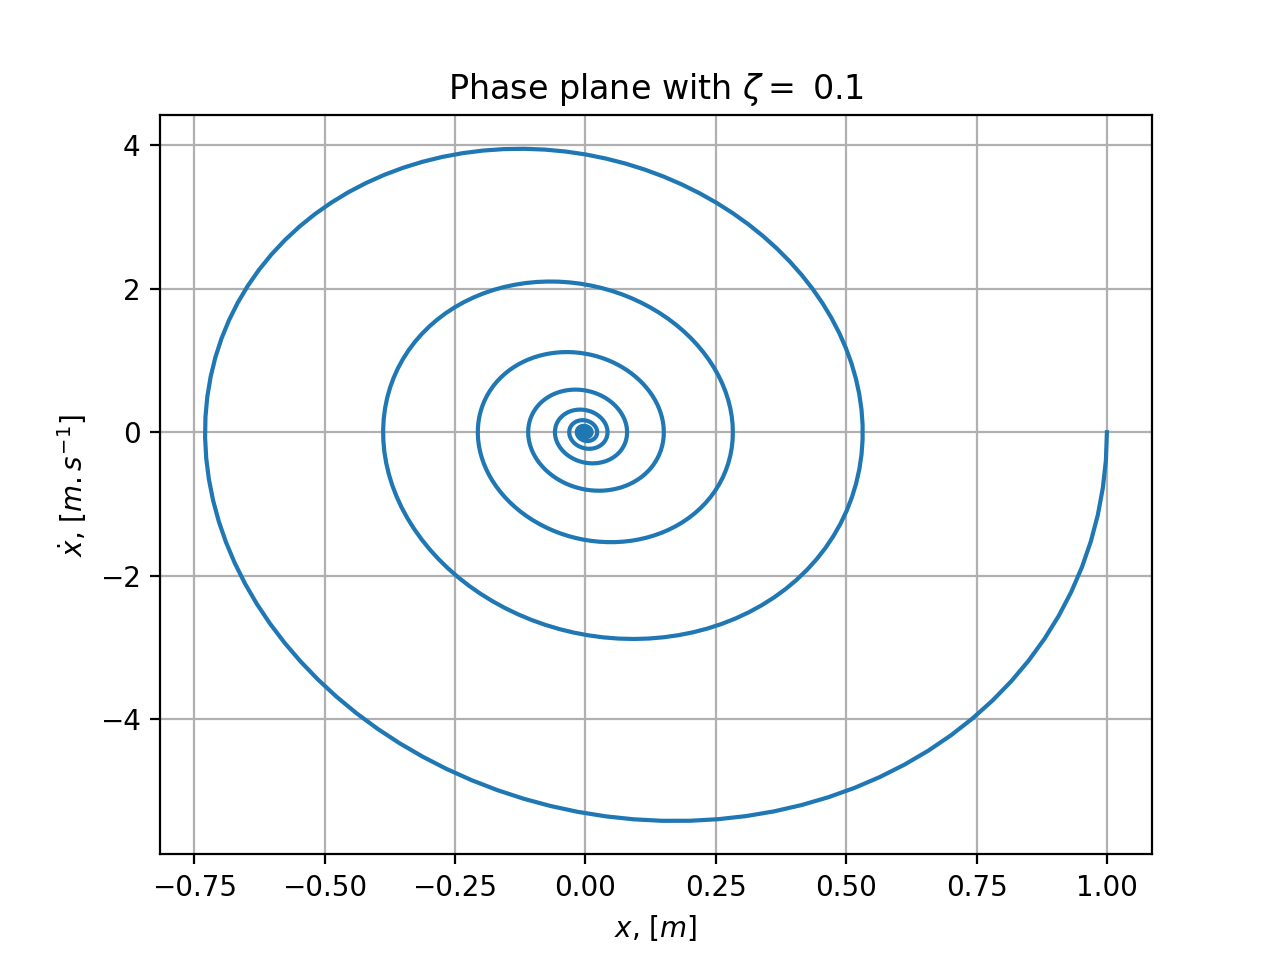

In [5]:
omega0 = 2. * np.pi * 1.
zeta   = .1
ad = 1.
omegad = 2. * np.pi * 1.2
Nt = 1000
tf = 10.
t = np.linspace(0., tf, Nt+1)
X0 = [1., 0.]
X = integrate.odeint(ode, X0, t, args = (zeta, omega0))

plt.figure()
plt.title("Phase plane with $\zeta =$ "+str(zeta))
plt.plot(X[:,0], X[:,1])
plt.grid()
plt.xlabel("$x$, [$m$]")
plt.ylabel("$\dot{x}$, [$m.s^{-1}$] ")
plt.show();

## Phase portrait with excitation

<IPython.core.display.Javascript object>


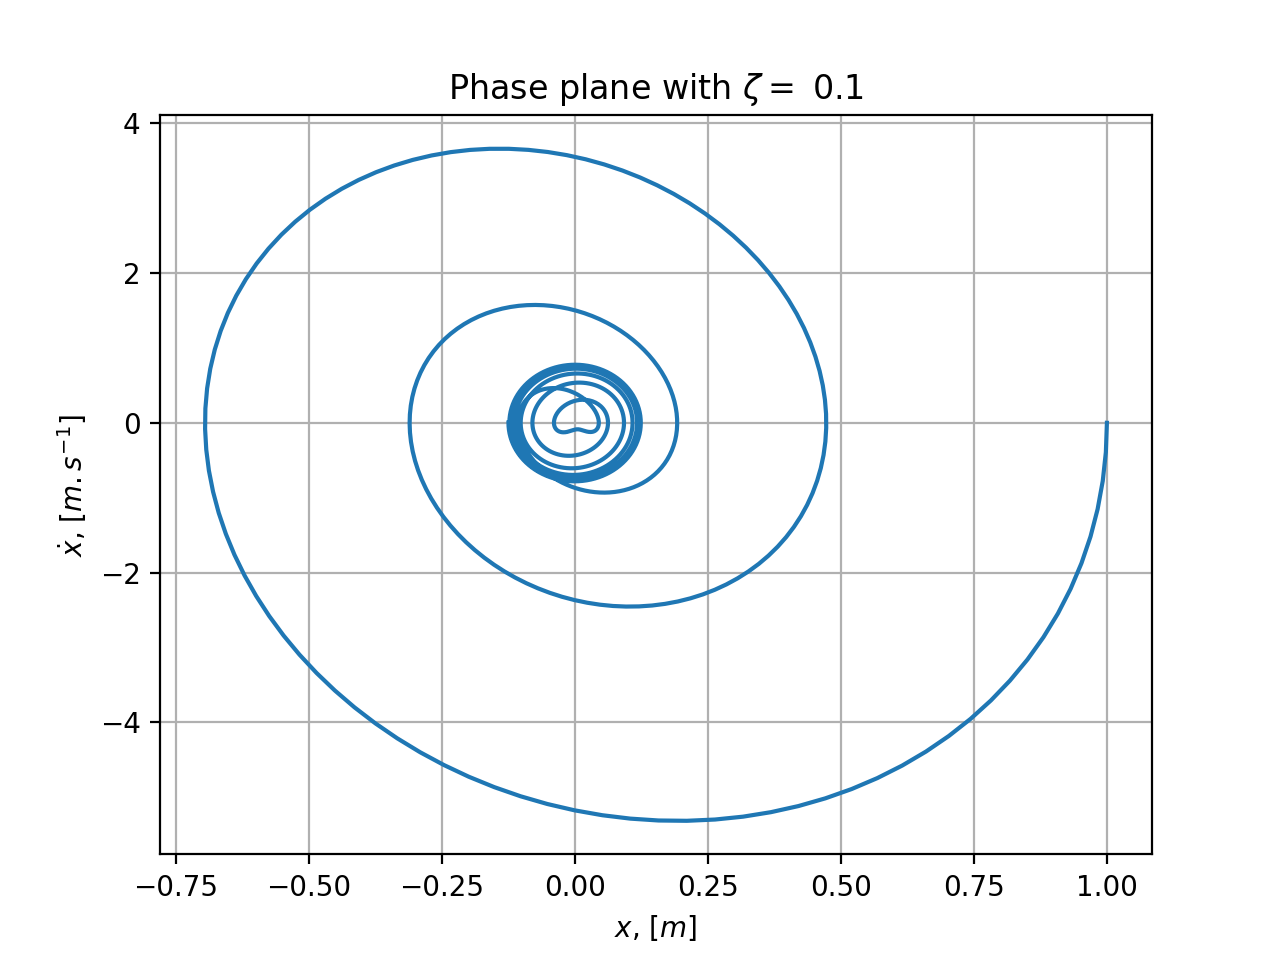

In [6]:
omegad_omega0 = 1.
X = integrate.odeint(odeDrive, X0, t, args = (zeta, omega0, omegad_omega0))

plt.figure()
plt.title("Phase plane with $\zeta =$ "+str(zeta))
plt.plot(X[:,0], X[:,1])
plt.grid()
plt.xlabel("$x$, [$m$]")
plt.ylabel("$\dot{x}$, [$m.s^{-1}$] ")
plt.show();